<a href="https://colab.research.google.com/github/hauphanlvc/CS114.L21AndCS114.L22.KHCL/blob/main/DuDoanBaiBao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Những thư viện cần thiết 

In [1]:
import numpy as np
import os,sys
import pandas as pd
import seaborn as sns
import re
import json

# 2.Đọc dữ liệu mà nhóm đã thu thập được

In [2]:
!git clone https://github.com/hauphanlvc/CS114.L21AndCS114.L22.KHCL.git

Cloning into 'CS114.L21AndCS114.L22.KHCL'...
remote: Enumerating objects: 314, done.
remote: Counting objects: 100% (314/314), done.
remote: Compressing objects: 100% (273/273), done.
remote: Total 314 (delta 122), reused 86 (delta 28), pack-reused 0
Receiving objects: 100% (314/314), 21.91 MiB | 8.82 MiB/s, done.
Resolving deltas: 100% (122/122), done.


In [3]:
def load_train_data(link):
  dirs = os.listdir(link)
  train_data = pd.DataFrame()
  article_link = []  
  headline = []
  is_sarcastic = []
  for file_json in dirs :
      f = open(link + "/" + file_json,'r')
      for line in f:
          try:
              value = json.loads(line)
              headline.append(value['headline'])
              is_sarcastic.append(value['is_sarcastic'])
              article_link .append(value['article_link'])
          except:
              continue   
      f.close()
  train_data['headline'] = headline
  train_data['is_sarcastic'] = is_sarcastic
  train_data['article_link'] = article_link
  return train_data


In [4]:
link = '/content/CS114.L21AndCS114.L22.KHCL/BTQT/SarcasmDetection/JsonFiles'
train_data = load_train_data(link)


In [5]:
train_data.head()

,headline,is_sarcastic,article_link
0,larry the cat already scratched the shit out o...,1,https://newsthump.com/2021/04/30/larry-the-cat...
1,queen and other top monarchs to break away and...,1,https://newsthump.com/2021/04/19/queen-and-oth...
2,boris johnson unveils new look cabinet,1,https://newsthump.com/2020/02/13/boris-johnson...
3,britain already 36% more british since leaving...,1,https://newsthump.com/2020/02/01/britain-alrea...
4,queen brilliantly steers attention away from p...,1,https://newsthump.com/2019/08/28/queen-brillia...


In [6]:
train_data.isna().sum() # kiểm tra dữ liệu có kiểu dữ liệu NaN hay không 

headline        0
is_sarcastic    0
article_link    0
dtype: int64

In [7]:
len(train_data) # độ dài của bộ dữ liệu 

432935

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


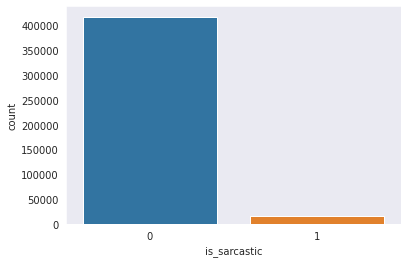

In [8]:
sns.set_style("dark")
sns.countplot(train_data.is_sarcastic)

## Nhóm em nhận thấy rằng dữ liệu vẫn chưa được cân bằng , số lượng báo truyền thống lớn hơn rất nhiều so với số lượng báo châm biếm 

# 3. xử lí dữ liệu dùng để test 


- Nhóm em sử dụng dữ liệu dùng để test từ nhóm của bạn Đặng Minh 

In [9]:
!gdown --id 1dM7bCzVlBdRyl1ovAqCMQwH8N5EgsiU5 -O is_sarcastic.json 

Downloading...
From: https://drive.google.com/uc?id=1dM7bCzVlBdRyl1ovAqCMQwH8N5EgsiU5
To: /content/is_sarcastic.json
100% 1.86M/1.86M [00:00<00:00, 58.0MB/s]


In [10]:
def load_test_data(link):
  # dirs = os.listdir(link)
  test_data = pd.DataFrame()
  article_link = []  
  headline = []
  is_sarcastic = []
  # for file_json in dirs :
  f = open(link,'r')
  for line in f:
      # print(line)
      try:
          value = json.loads(line)
          headline.append(value['headline'])
          is_sarcastic.append(value['is_sarcastic'])
          article_link .append(value['article_link'])
      except :
        continue

  f.close()
  test_data['headline'] = headline
  test_data['is_sarcastic'] = is_sarcastic
  test_data['article_link'] = article_link
  return test_data


In [11]:
def removen(text): # xóa kí tự \n trong bộ dữ liệu 
  return re.sub('\n', '', text)

In [12]:
link_test = '/content/is_sarcastic.json'
test_data_is_sarcastic = load_test_data(link_test)

test_data_is_sarcastic['headline'] = test_data_is_sarcastic['headline'].apply(removen)

In [13]:
test_data_is_sarcastic.head()

,headline,is_sarcastic,article_link
0,Local MP only got into politics so they could ...,1,https://chaser.com.au/national/local-mp-only-g...
1,God distances himself from Scott Morrison afte...,1,https://chaser.com.au/national/god-distances-h...
2,Angus Taylor takes break from dodgy Federal de...,1,https://chaser.com.au/national/angus-taylor-ta...
3,“Legally you have to tell me if you’re a cop” ...,1,https://chaser.com.au/general-news/legally-you...
4,“There’s no money to help arts workers” says g...,1,https://chaser.com.au/national/theres-no-money...


In [14]:
len(test_data_is_sarcastic) 

7610

In [15]:
test_data_is_sarcastic.isna().sum() # kiểm tra dữ liệu có kiểu dữ liệu NaN hay không 

headline        0
is_sarcastic    0
article_link    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


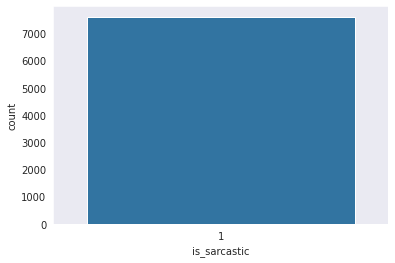

In [16]:
sns.set_style("dark")
sns.countplot(test_data_is_sarcastic.is_sarcastic)

- bộ dữ liệu dùng để test gồm 7610 headline là báo châm biếm 

## - Tụi em dùng thuật toán linear svm để phân loại headline .
## - Tụi em loại bỏ các từ được gọi là stop words của tiếng anh trước khi train model.

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
#chuyển đổi một bộ sưu tập các tài liệu văn bản thành một vectơ có số lượng thuật ngữ / mã thông báo. Nó cũng cho phép xử lý trước dữ liệu văn bản trước khi tạo biểu diễn vectơ, loại bỏ các từ thuộc Stop words  của tiếng anh
# Stop words là 
def Model(train_data,test_data):
  vectorizer = CountVectorizer(stop_words="english")
  X_train = train_data['headline']
  X_test = test_data['headline']
  y_train = train_data['is_sarcastic']
  y_test = test_data['is_sarcastic']

  # vectorizer = CountVectorizer(stop_words = 'english', preprocessor = clean_text)
  training_features = vectorizer.fit_transform(X_train)    
  test_features = vectorizer.transform(X_test)

  # Training
  model = LinearSVC()
  model.fit(training_features, y_train)
  y_pred = model.predict(test_features)

  # Evaluation
  acc = accuracy_score(y_test, y_pred)

  print("Accuracy: {:.2f}".format(acc*100))


In [18]:
Model(train_data,test_data_is_sarcastic)

Accuracy: 28.34


# Nhóm em sử dụng bộ dữ liệu gồm các headline là báo chính thống của nhóm bạn Phan Đại Dương để đánh giá model của tụi em 

In [19]:
!gdown --id 1_cHBAp6_pdE5gd-lXIqO6Tl1jUCBR14i -O duong_.json


Downloading...
From: https://drive.google.com/uc?id=1_cHBAp6_pdE5gd-lXIqO6Tl1jUCBR14i
To: /content/duong_.json
6.46MB [00:00, 64.4MB/s]


In [20]:
link_test = '/content/duong_.json'
test_data_non_sarcastic = load_test_data(link_test)

test_data_non_sarcastic['headline'] = test_data_non_sarcastic['headline'].apply(removen)

In [21]:
len(test_data_non_sarcastic) 

37847

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


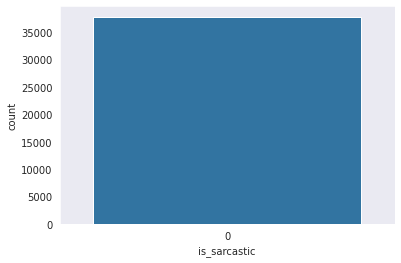

In [22]:
sns.set_style("dark")
sns.countplot(test_data_non_sarcastic.is_sarcastic)

- Bộ dữ liệu có tất cả 37847 là báo truyền thống 

In [23]:
Model(train_data,test_data_non_sarcastic)

Accuracy: 99.10


In [27]:
def DemSoLuong(data): # đếm số lượng báo châm biếm và báo truyền thống trên 1 bộ dữ liệu 
  SoLuongBaoChamBiem = 0
  
  for i in range(len(data)):
    if data['is_sarcastic'][i] ==  1:
      SoLuongBaoChamBiem +=1 
  return {SoLuongBaoChamBiem,len(data)-SoLuongBaoChamBiem}


In [28]:
# với bộ dữ liệu của chúng em dùng để train , thì số lương báo châm biếm và báo truyền thống tỉ lệ là 
ChamBiem , TruyenThong = DemSoLuong(train_data)
print(DemSoLuong(train_data))
print('Số lượng báo châm biếm ',ChamBiem)
print('Số lượng báo truyền thống',TruyenThong)


{417882, 15053}
Số lượng báo châm biếm  417882
Số lượng báo truyền thống 15053


# Đánh giá :
- với bộ dữ liệu mà nhóm thu thập được thì phân loại tốt với báo truyền thống với accuracy là 99.10 nhưng lại tệ với báo châm biếm với accuracy là  28,34
- Nhóm em đoán rằng do bộ dữ liệu mà tụi em mình để train chưa được cân bằng , khi tỉ lệ giữa headline của báo châm biếm và báo truyền thống chênh lệch rất lớn  

# Điều chỉnh dữ liệu dùng để train 

In [29]:
train_non_sarcastic_data = train_data.query("is_sarcastic == 0")
train_is_sarcastic_data = train_data.query("is_sarcastic == 1")

# source code : https://stackoverflow.com/questions/45699651/error-only-list-like-objects-are-allowed-to-be-passed-to-isin-you-passed-a

In [30]:
train_is_sarcastic_data.head()

,headline,is_sarcastic,article_link
0,larry the cat already scratched the shit out o...,1,https://newsthump.com/2021/04/30/larry-the-cat...
1,queen and other top monarchs to break away and...,1,https://newsthump.com/2021/04/19/queen-and-oth...
2,boris johnson unveils new look cabinet,1,https://newsthump.com/2020/02/13/boris-johnson...
3,britain already 36% more british since leaving...,1,https://newsthump.com/2020/02/01/britain-alrea...
4,queen brilliantly steers attention away from p...,1,https://newsthump.com/2019/08/28/queen-brillia...


In [31]:
train_non_sarcastic_data.head()

,headline,is_sarcastic,article_link
15053,"‘no realistic path’ for quick vote on $2,000 s...",0,https://www.nytimes.com/2020/12/30/us/politics...
15054,the bomb that struck the heart of nashville,0,https://www.nytimes.com/2020/12/30/opinion/nas...
15055,closing of air traffic control center for viru...,0,https://www.nytimes.com/2020/12/30/us/dfw-airp...
15056,the small colorado town felt insulated from th...,0,https://www.nytimes.com/2020/12/30/us/simla-co...
15057,critics say nashville police could have done m...,0,https://www.nytimes.com/2020/12/30/us/nashvill...


In [32]:
print('số lượng báo truyền thống :',len(train_non_sarcastic_data))
print('số lượng báo châm biếm  :',len(train_is_sarcastic_data))

số lượng báo truyền thống : 417882
số lượng báo châm biếm  : 15053


- Ta tiền hành giảm số lượng báo truyền thống còn bằng với số lượng báo châm biếm để tạo dữ liệu để train mới

In [33]:
new_train_data = train_is_sarcastic_data.append(train_non_sarcastic_data[:len(train_is_sarcastic_data)+1])
print('kích thước của bộ dữ liệu mới :', len(new_train_data))

kích thước của bộ dữ liệu mới : 30107


In [34]:
new_train_data

,headline,is_sarcastic,article_link
0,larry the cat already scratched the shit out o...,1,https://newsthump.com/2021/04/30/larry-the-cat...
1,queen and other top monarchs to break away and...,1,https://newsthump.com/2021/04/19/queen-and-oth...
2,boris johnson unveils new look cabinet,1,https://newsthump.com/2020/02/13/boris-johnson...
3,britain already 36% more british since leaving...,1,https://newsthump.com/2020/02/01/britain-alrea...
4,queen brilliantly steers attention away from p...,1,https://newsthump.com/2019/08/28/queen-brillia...
...,...,...,...
30102,trump polls in red states: women favor joe biden,0,https://www.nytimes.com/2020/09/24/us/politics...
30103,17 new books to watch for in october,0,https://www.nytimes.com/2020/09/24/books/octob...
30104,what will it take to vote in milwaukee?,0,https://www.nytimes.com/2020/09/24/us/politics...
30105,"times square, grand central and the laws that ...",0,https://www.nytimes.com/2020/09/24/arts/design...


In [35]:
new_train_data.isna().sum() # kiểm tra dữ liệu có kiểu dữ liệu NaN hay không 

headline        0
is_sarcastic    0
article_link    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


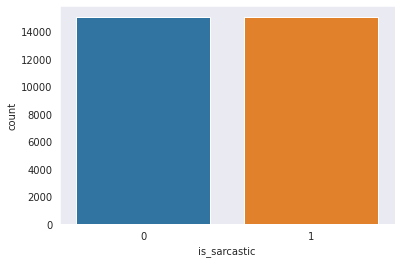

In [36]:
# đồ thị biểu diễn độ tương quan giữa 2 loại báo trên bộ dữ liệu train mới 
sns.set_style("dark")
sns.countplot(new_train_data.is_sarcastic)

In [37]:
Model(new_train_data,test_data_non_sarcastic) # kiểm tra trên dữ liệu là báo chính thống

Accuracy: 84.00


In [38]:
Model(new_train_data,test_data_is_sarcastic) # kiểm tra trên dữ liệu là báo châm biếm

Accuracy: 67.69


# Nhận xét :
- sau khi điều chỉnh bộ dữ liệu dùng để train model , accuracy trên 2 bộ dữ liệu đã điều chỉnh đã thay đổi 1 nhiều hơn với bộ dữ liệu chỉ toàn là báo chính thống thì accuracy giảm từ 99.10 thành 84.00 và ngược lại chỉ toàn báo châm thống thì accuracy tăng từ 28.34 thành 67.69

# nguồn tài liệu kham khảo :
- https://medium.com/data-from-the-trenches/text-classification-the-first-step-toward-nlp-mastery-f5f95d525d73 
- https://www.kaggle.com/madz2000/sarcasm-detection-with-glove-word2vec-83-accuracy
